**Import necessary libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

**Read the dataset**

In [36]:
df = pd.read_csv('/content/StudentsPerformance.csv')

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


**Dataset Summary**

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
#Checking the number of Null Values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

**There are no Null values in any of the columns**

**Checking each columns features**

1. Gender

In [6]:
count  = 0
for i in df['gender'].unique():
    count = count + 1
    print(count,'. ',i)

1 .  female
2 .  male


2. Race/Ehtnicity of People

In [7]:
count = 0
for i in sorted(df['race/ethnicity'].unique()):
    count = count + 1
    print(count, '. ',i)
print('Number of different races/ethnicity of people: ', df['race/ethnicity'].nunique())

1 .  group A
2 .  group B
3 .  group C
4 .  group D
5 .  group E
Number of different races/ethnicity of people:  5


3. Parent's level of Education

In [8]:
count = 0
for i in df['parental level of education'].unique():
    count = count + 1
    print(count, '. ', i)

1 .  bachelor's degree
2 .  some college
3 .  master's degree
4 .  associate's degree
5 .  high school
6 .  some high school


4. Different types of lunches

In [9]:
count  = 0
for i in df['lunch'].unique():
    count = count + 1
    print(count,'. ',i)

1 .  standard
2 .  free/reduced


5. Types of Test Prepration Course

In [10]:
count  = 0
for i in df['test preparation course'].unique():
    count = count + 1
    print(count,'.',i)

1 . none
2 . completed


**Define features (X) and target (y)**

In [11]:
X = df.drop(columns=['math score'], axis=1)
y = df['math score']

In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   reading score                1000 non-null   int64 
 6   writing score                1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


**Data Preprocessing**

In [13]:
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns.tolist()
cat_features.remove('parental level of education')  # Exclude 'parental level of education'

In [14]:
numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()
parents_transformer = OrdinalEncoder(categories=[['some high school', 'high school', 'some college', "associate's degree", "bachelor's degree", "master's degree"]])

In [15]:
preprocessor = ColumnTransformer(
    transformers=[
        ("OneHotEncoder", oh_transformer, cat_features),
        ("OrdinalEncoder", parents_transformer, ['parental level of education']),
        ("StandardScaler", numeric_transformer, num_features)
    ])

In [16]:
X = preprocessor.fit_transform(X)

**Split the data into training and testing sets**

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
print(len(X_train),len(X_test),len(y_train),len(y_test))

800 200 800 200


In [19]:
# Initialize a dictionary to store model performance metrics and scatter plots
model_metrics = {}

**Linear Regression Model**

In [20]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)

In [33]:
y_pred

array([76.74      , 54.15      , 77.72      , 77.03      , 81.53      ,
       85.55      , 65.15      , 55.84      , 75.62      , 52.19      ,
       52.03      , 36.96      , 68.44      , 51.81      , 81.75      ,
       72.27      , 50.53      , 47.25      , 48.86      , 52.22      ,
       73.69      , 44.08      , 63.13      , 37.01      , 78.99      ,
       85.82      , 71.55      , 47.        , 37.31      , 48.29      ,
       64.86      , 68.5       , 63.16      , 78.97      , 82.37      ,
       48.17      , 74.21      , 71.74      , 66.37      , 16.62833333,
       80.21      , 67.17      , 69.47      , 60.23      , 87.16      ,
       62.22      , 69.92      , 23.49833333, 89.07      , 65.5       ,
       75.16      , 71.61      , 80.83      , 47.17      , 64.81      ,
       69.11      , 87.88      , 58.27      , 84.81      , 87.94      ,
       54.71      , 72.08      , 65.58      , 53.98      , 92.33      ,
       63.27      , 60.89      , 57.01      , 59.65      , 86.46

In [21]:
# Evaluate and store Linear Regression model performance

mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
model_metrics["Linear Regression"] = [mae_test, rmse_test, r2_test]

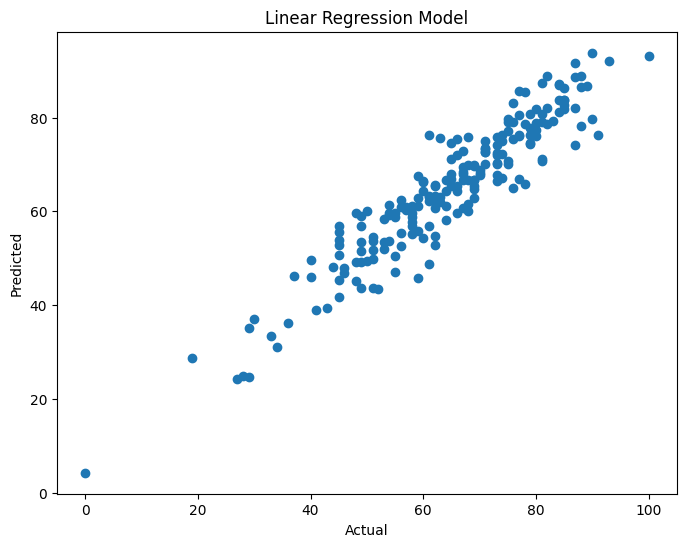

In [22]:
# Scatter plot for Linear Regression model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Linear Regression Model')
plt.show()

**K-Neighbors Regressor Model**

In [23]:
knn_model = KNeighborsRegressor()
knn_model.fit(X_train, y_train)
y_pred = knn_model.predict(X_test)

In [24]:
# Evaluate and store K-Neighbors Regressor model performance
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
model_metrics["K-Neighbors Regressor"] = [mae_test, rmse_test, r2_test]

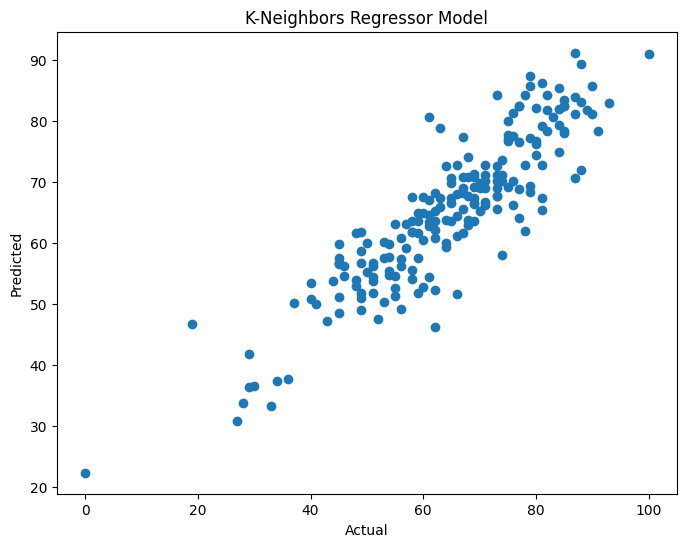

In [25]:
# Scatter plot for K-Neighbors Regressor model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('K-Neighbors Regressor Model')
plt.show()

**Decision Tree Regressor Model**

In [26]:
dt_model = DecisionTreeRegressor()
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

In [27]:
# Evaluate and store Decision Tree Regressor model performance
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
model_metrics["Decision Tree Regressor"] = [mae_test, rmse_test, r2_test]

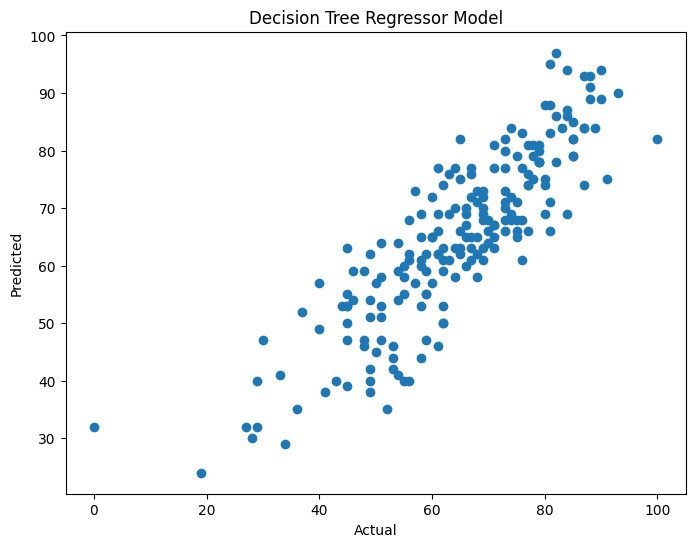

In [28]:
# Scatter plot for Decision Tree Regressor model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Decision Tree Regressor Model')
plt.show()

**Random Forest Regressor Model**

In [29]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

In [30]:
# Evaluate and store Random Forest Regressor model performance
mae_test = mean_absolute_error(y_test, y_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_pred))
r2_test = r2_score(y_test, y_pred)
model_metrics["Random Forest Regressor"] = [mae_test, rmse_test, r2_test]

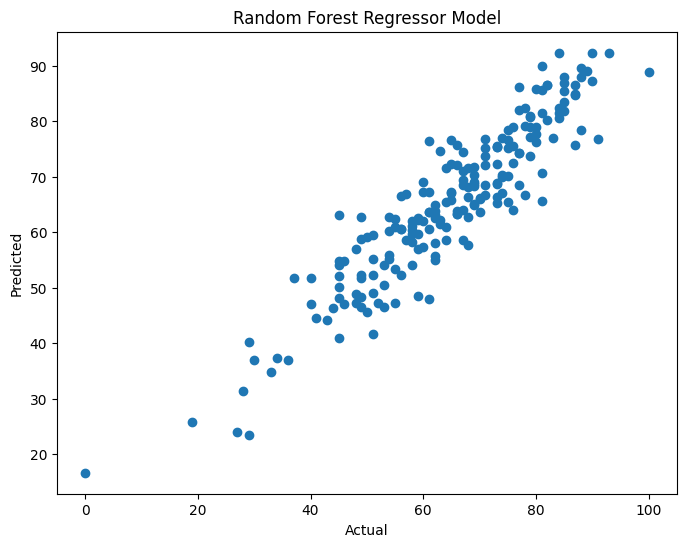

In [31]:
# Scatter plot for Random Forest Regressor model
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Random Forest Regressor Model')
plt.show()

**Results**

In [32]:
# Create a DataFrame to display model performance metrics
metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index', columns=['MAE', 'RMSE', 'R2 Score'])

# Print the table of model performance metrics
print(metrics_df)

                              MAE      RMSE  R2 Score
Linear Regression        4.182188  5.372845  0.881369
K-Neighbors Regressor    5.618000  7.236436  0.784802
Decision Tree Regressor  6.400000  8.093825  0.730786
Random Forest Regressor  4.653879  5.982279  0.852930
